# Thématique 1 : Introduction au langage R et Analyse univariée

Réalisé par Alexandre Pauly

### Importation des librairies

In [135]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data pre-processing

In [136]:
# Préparation du fichier de données
filepath = "../data"
filename = "FrenchCities.csv"
file = os.path.join(filepath, filename)

# Lecture des données
df = pd.read_csv(file, delimiter=";")

# Affichage des indicateurs de positions et de dispersions
df.describe()

,CLIMAT,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.375000,29.678125,4364.593750,64.500000,59.500000,55.000000,51.312500,57.437500,58.031250,43.593750,...,10.718750,12.031250,13.187500,14.312500,139.187500,11.477188,15.143750,2004.062500,44.621875,2.499062
std,1.099853,10.918192,3769.979848,26.370805,20.730218,18.419835,17.049146,17.888431,22.313723,19.501628,...,3.400516,3.287163,3.847391,3.995461,42.016462,2.741351,3.410887,538.283049,8.479401,3.068986
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.290000
25%,1.000000,25.600000,2149.250000,52.750000,48.750000,43.000000,44.000000,49.000000,46.250000,33.000000,...,9.250000,10.750000,11.750000,12.750000,122.750000,10.487500,14.425000,1793.500000,43.405000,0.067500
50%,2.000000,28.750000,3840.500000,64.000000,56.500000,52.500000,47.500000,53.000000,57.000000,47.000000,...,12.000000,13.000000,15.000000,16.000000,156.500000,11.200000,15.500000,1900.000000,45.925000,2.365000
75%,3.000000,35.100000,4734.500000,78.250000,70.500000,66.500000,58.500000,68.500000,71.000000,54.250000,...,13.000000,14.000000,15.250000,17.000000,165.750000,13.392500,17.200000,2085.750000,48.097500,5.067500
max,4.000000,58.400000,21258.000000,130.000000,105.000000,98.000000,102.000000,100.000000,107.000000,80.000000,...,16.000000,19.000000,20.000000,22.000000,201.000000,15.280000,18.600000,2917.000000,50.380000,8.440000


**Remarque** : Utiliser la fonction describe permet d'afficher les indicateurs de positions et de dispersions d'une ou plusieurs colonnes.

Ce jeu de données comptabilise des données météorlogiques pour un nombre de villes données. Ici, nous comptons 32 villes. La moyenne des températures moyenne annuelle de l'ensemble de ces villes est de 11.48 degrés avec un nombre d'heure d'ensoleillement par jour moyen de 2004 heures. On sait également qu'en décembre, les villes recensées ici connaissent entre 0 et 22 jours de pluie dans le mois.

In [137]:
# Affichage des indicateurs de positions et de dispersion pour la colonne CLIMAT
df['NO2'].describe()

count    32.000000
mean     29.678125
std      10.918192
min       0.000000
25%      25.600000
50%      28.750000
75%      35.100000
max      58.400000
Name: NO2, dtype: float64

In [138]:
df.head()

,CLIMAT,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
Ajaccio,2,18.5,808,78,69,51,39,43,23,10,...,6,10,11,13,95,14.71,14.5,2811,41.55,8.44
Angers,3,16.5,3490,65,50,60,45,50,55,35,...,12,13,15,16,154,11.28,14.5,1899,47.28,-0.33
Angoulme,4,17.0,1923,79,68,64,62,70,58,53,...,12,13,15,16,160,12.02,14.9,1989,45.39,0.09
Besancon,1,27.3,1789,94,87,75,74,86,107,80,...,13,14,15,15,169,10.04,17.6,1897,47.15,6.02
Biarritz,3,16.0,2172,128,105,98,102,100,91,69,...,14,15,16,17,177,13.58,12.3,1921,43.29,-1.34


In [139]:
df.tail()

,CLIMAT,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
Strasbourg,1,38.5,3506,51,44,42,58,71,88,73,...,12,12,13,14,158,9.72,18.6,1696,48.35,7.45
Toulon,2,43.3,3849,76,86,82,60,49,35,12,...,5,9,9,11,81,15.28,14.0,2917,43.07,5.56
Toulouse,1,35.4,3832,53,50,52,55,65,65,44,...,10,11,12,14,137,12.68,16.2,2081,43.36,1.26
Tours,4,28.5,3928,63,55,52,51,53,58,47,...,13,13,15,16,157,11.22,15.6,1859,47.23,0.41
Error,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00,0.0,0,0.00,0.00


In [140]:
df.shape

(32, 34)

On sait qu'il y a 32 villes pour 35 variables à étudier.

In [141]:
df.dtypes

CLIMAT             int64
NO2              float64
DENSITY            int64
JANr               int64
FEBr               int64
MARr               int64
APRr               int64
MAYr               int64
JUNr               int64
JULr               int64
AUGr               int64
SEPr               int64
OCTr               int64
NOVr               int64
DECr               int64
RAINFALL           int64
JANdr              int64
FEVdr              int64
MARdr              int64
APRdr              int64
MAYdr              int64
JUNdr              int64
JULdr              int64
AUGdr              int64
SEPdr              int64
OCTdr              int64
NOVdr              int64
DECdr              int64
DAYS_RAINFALL      int64
TEMP             float64
TEMP_RANGE       float64
SUNSHINE           int64
LATITUDE         float64
LONGITUDE        float64
dtype: object

Toutes les variables ne sont pas quantitatives, CLIMAT est une variable qualitative, mais elle est indexée par 1, 2, 3 et 4 pour représenter les différents types de climat. Sinon, le reste est quantitatif.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Ajaccio to Error
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CLIMAT         32 non-null     int64  
 1   NO2            32 non-null     float64
 2   DENSITY        32 non-null     int64  
 3   JANr           32 non-null     int64  
 4   FEBr           32 non-null     int64  
 5   MARr           32 non-null     int64  
 6   APRr           32 non-null     int64  
 7   MAYr           32 non-null     int64  
 8   JUNr           32 non-null     int64  
 9   JULr           32 non-null     int64  
 10  AUGr           32 non-null     int64  
 11  SEPr           32 non-null     int64  
 12  OCTr           32 non-null     int64  
 13  NOVr           32 non-null     int64  
 14  DECr           32 non-null     int64  
 15  RAINFALL       32 non-null     int64  
 16  JANdr          32 non-null     int64  
 17  FEVdr          32 non-null     int64  
 18  MARdr   

In [143]:
df.columns

Index(['CLIMAT', 'NO2', 'DENSITY', 'JANr', 'FEBr', 'MARr', 'APRr', 'MAYr',
       'JUNr', 'JULr', 'AUGr', 'SEPr', 'OCTr', 'NOVr', 'DECr', 'RAINFALL',
       'JANdr', 'FEVdr', 'MARdr', 'APRdr', 'MAYdr', 'JUNdr', 'JULdr', 'AUGdr',
       'SEPdr', 'OCTdr', 'NOVdr', 'DECdr', 'DAYS_RAINFALL', 'TEMP',
       'TEMP_RANGE', 'SUNSHINE', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

Explication des variables :
- CLIMAT : Type de climat (Continental=1, Mediterranean=2, Oceanic=3 et semi-oceanic=4)  
- NO2 : Dioxyde de nitrogène
- DENSITY : Habitants par km² 
- RAINFALL : Précipitations moyennes à l'année (mm) 
- "MONTH"+r : Précipitations moyennes mensuelles (12 variables) 
- DAY_RAINFALL : Moyenne de jours de pluie annuelle 
- "MONTH"=dr : Moyenne de jours de pluie mensuelle (12 variables) 
- TEMP : Température annuelle moyenne (°C) 
- TEMP_RANGE : Variation de température 
- SUNSHINE : Moyenne de jours de soleil (heures par jour) 
- LATITUDE : Latitude 
- LONGITUDE : Longitude

In [144]:
df.isnull().sum()

CLIMAT           0
NO2              0
DENSITY          0
JANr             0
FEBr             0
MARr             0
APRr             0
MAYr             0
JUNr             0
JULr             0
AUGr             0
SEPr             0
OCTr             0
NOVr             0
DECr             0
RAINFALL         0
JANdr            0
FEVdr            0
MARdr            0
APRdr            0
MAYdr            0
JUNdr            0
JULdr            0
AUGdr            0
SEPdr            0
OCTdr            0
NOVdr            0
DECdr            0
DAYS_RAINFALL    0
TEMP             0
TEMP_RANGE       0
SUNSHINE         0
LATITUDE         0
LONGITUDE        0
dtype: int64

Le jeu de données n'a pas l'air de présenter de données manquantes.

## Affichage des données

In [145]:
print(df)

             CLIMAT   NO2  DENSITY  JANr  FEBr  MARr  APRr  MAYr  JUNr  JULr  \
Ajaccio           2  18.5      808    78    69    51    39    43    23    10   
Angers            3  16.5     3490    65    50    60    45    50    55    35   
Angoulme          4  17.0     1923    79    68    64    62    70    58    53   
Besancon          1  27.3     1789    94    87    75    74    86   107    80   
Biarritz          3  16.0     2172   128   105    98   102   100    91    69   
Bordeaux          3  29.0     4888   100    84    66    57    64    71    52   
Brest             3  22.7     2821   130    98    89    77    74    60    51   
Caen              3  25.0     4217    65    61    45    44    53    52    45   
Clermont_Fd       1  29.3     3318    28    27    30    41    78    79    48   
Dijon             1  24.7     3763    62    48    51    48    68    79    44   
Grenoble          1  35.0     8734    80    79    69    69    83    94    74   
Lille             3  25.8     6565    45

## Pre-process data

In [146]:
# Remplacement des valeurs quantitatives en catégories
def pre_process_data(df):
    categories = {
        1: 'CONT',
        2: 'MED',
        3: 'OCEAN',
        4: 'SEMI_OCEAN'
    }

    df['CLIMAT'] = df['CLIMAT'].replace(categories)

    return df

### Exercice

In [147]:
# Refaire la même chose en ajoutant 10 à la série NO2. Conclusion.
if 'NO2' in df.columns:
    df['NO2'] = df['NO2'] + 10
else:
    print("La colonne 'NO2' n'existe pas dans le fichier.")

# Refaire la même chose en multipliant la série NO2 par 2. Conclusion.
if 'NO2' in df.columns:
    df['NO2'] = df['NO2'] * 2
else:
    print("La colonne 'NO2' n'existe pas dans le fichier.")

# Refaire la même chose en ajoutant la valeur supplémentaire 25 à la série NO2. Conclusion.
if 'NO2' in df.columns:
    df['NO2'] = df['NO2'] + 25
else:
    print("La colonne 'NO2' n'existe pas dans le fichier.")

df.describe()

,CLIMAT,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.375000,104.356250,4364.593750,64.500000,59.500000,55.000000,51.312500,57.437500,58.031250,43.593750,...,10.718750,12.031250,13.187500,14.312500,139.187500,11.477188,15.143750,2004.062500,44.621875,2.499062
std,1.099853,21.836385,3769.979848,26.370805,20.730218,18.419835,17.049146,17.888431,22.313723,19.501628,...,3.400516,3.287163,3.847391,3.995461,42.016462,2.741351,3.410887,538.283049,8.479401,3.068986
min,1.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.290000
25%,1.000000,96.200000,2149.250000,52.750000,48.750000,43.000000,44.000000,49.000000,46.250000,33.000000,...,9.250000,10.750000,11.750000,12.750000,122.750000,10.487500,14.425000,1793.500000,43.405000,0.067500
50%,2.000000,102.500000,3840.500000,64.000000,56.500000,52.500000,47.500000,53.000000,57.000000,47.000000,...,12.000000,13.000000,15.000000,16.000000,156.500000,11.200000,15.500000,1900.000000,45.925000,2.365000
75%,3.000000,115.200000,4734.500000,78.250000,70.500000,66.500000,58.500000,68.500000,71.000000,54.250000,...,13.000000,14.000000,15.250000,17.000000,165.750000,13.392500,17.200000,2085.750000,48.097500,5.067500
max,4.000000,161.800000,21258.000000,130.000000,105.000000,98.000000,102.000000,100.000000,107.000000,80.000000,...,16.000000,19.000000,20.000000,22.000000,201.000000,15.280000,18.600000,2917.000000,50.380000,8.440000


## Graphiques

Variables utilisées pour les graphiques :
- CLIMAT : Variable qualitative lorsqu'elle est transformée en CONT, MED, OCEAN, etc.
- DENSITY : Variable quantitative continue car elle peut prendre n'importe qu'elle valeur.
- AUGdr : Variable quantitative discrète car elle ne peut pas prendre n'importe qu'elle valeur. C'est forcément un entier compris entre 0 et le nombre de jours dans le mois en question.

### Boîte de Tukey

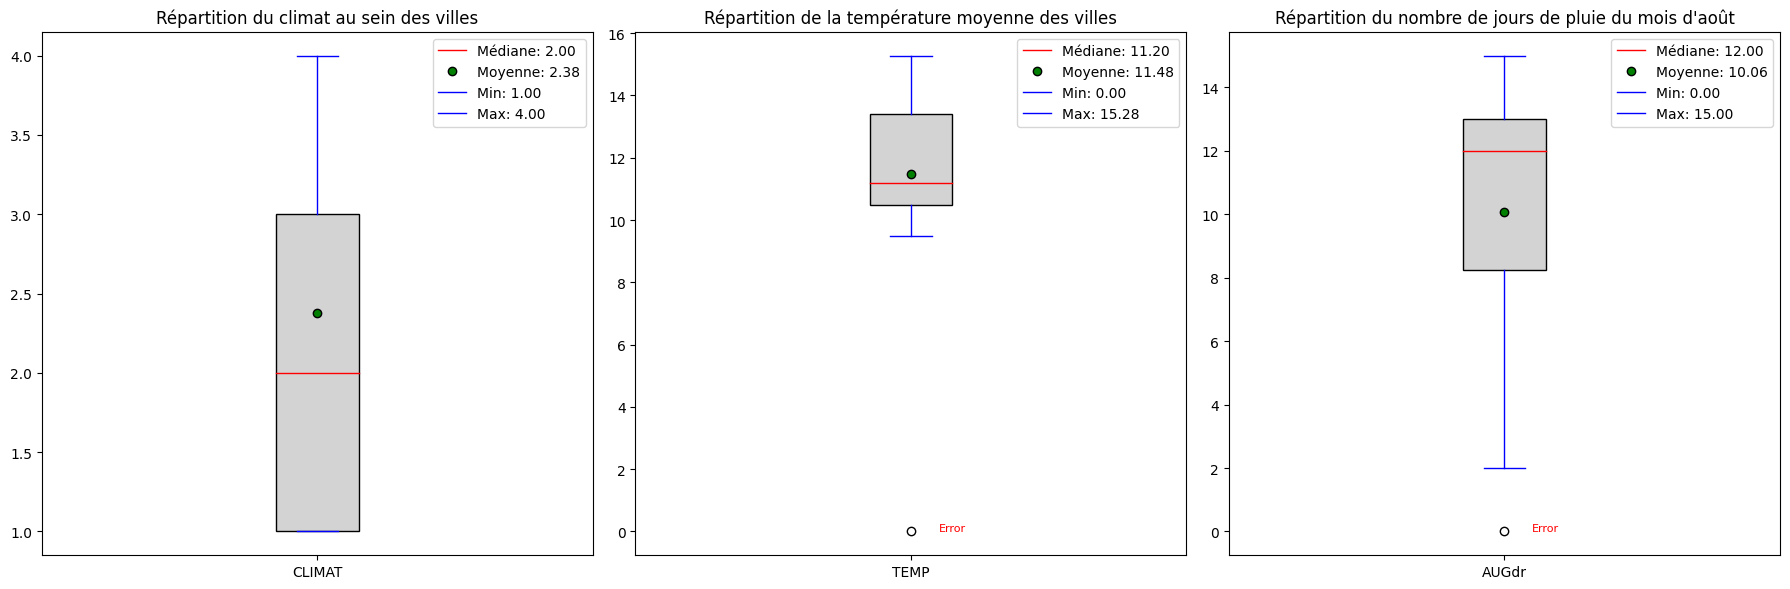

In [148]:
# Préparation des variables
climat_counts = df['CLIMAT']
temp_counts = df['TEMP']
augr_counts = df['AUGdr']
cities = df.index

# Fonction pour détecter les outliers via la méthode IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = [i for i, x in enumerate(data) if x < lower_bound or x > upper_bound]
    outliers = [data[i] for i in outliers_indices]
    
    return outliers, outliers_indices

# Détection des outliers pour climat
outliers_climat, indices_outliers_climat = detect_outliers_iqr(climat_counts)
outliers_temp, indices_outliers_temp = detect_outliers_iqr(temp_counts)
outliers_augr, indices_outliers_augr = detect_outliers_iqr(augr_counts)

# Création de la figure avec 1 ligne et 3 colonnes pour les boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Couleurs personnalisées pour min et max
colors = dict(whiskers="blue", caps="blue", medians="red", means="green", fliers="purple")

# Boxplot pour CLIMAT
bp1 = axs[0].boxplot(climat_counts, showmeans=True, patch_artist=True,
                     boxprops=dict(facecolor="lightgray"),
                     whiskerprops=dict(color=colors['whiskers']),
                     capprops=dict(color=colors['caps']),
                     medianprops=dict(color=colors['medians']),
                     meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

axs[0].set_title("Répartition du climat au sein des villes")
axs[0].set_xticklabels(['CLIMAT'])

# Récupération des statistiques
median_climat = np.median(climat_counts)
mean_climat = np.mean(climat_counts)
min_climat = np.min(climat_counts)
max_climat = np.max(climat_counts)

# Légende personnalisée pour CLIMAT
axs[0].legend([bp1["medians"][0], bp1["means"][0], bp1["whiskers"][0], bp1["whiskers"][1]],
              [f"Médiane: {median_climat:.2f}", f"Moyenne: {mean_climat:.2f}", f"Min: {min_climat:.2f}", f"Max: {max_climat:.2f}"],
              loc="upper right")

# Ajouter des annotations pour les outliers de climat
for i in indices_outliers_climat:
    axs[0].text(1.05, climat_counts[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot pour TEMP
bp2 = axs[1].boxplot(temp_counts, showmeans=True, patch_artist=True,
                     boxprops=dict(facecolor="lightgray"),
                     whiskerprops=dict(color=colors['whiskers']),
                     capprops=dict(color=colors['caps']),
                     medianprops=dict(color=colors['medians']),
                     meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

axs[1].set_title("Répartition de la température moyenne des villes")
axs[1].set_xticklabels(['TEMP'])

# Récupération des statistiques
median_temp = np.median(temp_counts)
mean_temp = np.mean(temp_counts)
min_temp = np.min(temp_counts)
max_temp = np.max(temp_counts)

# Légende personnalisée pour TEMP
axs[1].legend([bp2["medians"][0], bp2["means"][0], bp2["whiskers"][0], bp2["whiskers"][1]],
              [f"Médiane: {median_temp:.2f}", f"Moyenne: {mean_temp:.2f}", f"Min: {min_temp:.2f}", f"Max: {max_temp:.2f}"],
              loc="upper right")

# Ajouter des annotations pour les outliers de temp
for i in indices_outliers_temp:
    axs[1].text(1.05, temp_counts[i], cities[i], color='red', fontsize=8, ha='left')

# Boxplot pour AUGdr
bp3 = axs[2].boxplot(augr_counts, showmeans=True, patch_artist=True,
                     boxprops=dict(facecolor="lightgray"),
                     whiskerprops=dict(color=colors['whiskers']),
                     capprops=dict(color=colors['caps']),
                     medianprops=dict(color=colors['medians']),
                     meanprops=dict(markerfacecolor=colors['means'], marker="o", markeredgecolor="black"))

axs[2].set_title("Répartition du nombre de jours de pluie du mois d'août")
axs[2].set_xticklabels(['AUGdr'])

# Récupération des statistiques
median_augr = np.median(augr_counts)
mean_augr = np.mean(augr_counts)
min_augr = np.min(augr_counts)
max_augr = np.max(augr_counts)

# Légende personnalisée pour AUGdr
axs[2].legend([bp3["medians"][0], bp3["means"][0], bp3["whiskers"][0], bp3["whiskers"][1]],
              [f"Médiane: {median_augr:.2f}", f"Moyenne: {mean_augr:.2f}", f"Min: {min_augr:.2f}", f"Max: {max_augr:.2f}"],
              loc="upper right")

# Ajouter des annotations pour les outliers de augr
for i in indices_outliers_augr:
    axs[2].text(1.05, augr_counts[i], cities[i], color='red', fontsize=8, ha='left')

# Ajustement de la mise en page
plt.tight_layout()

# Affichage du graphique
plt.show()

Pour le premier graphique, étant donné que le climat est une variable qualitative et que ses valeurs sont codés de 1 à 4, il est inutile d'en faire une analyse. On voit bien que ce type de graphique n'est pas adapté.

Le second graphique montre que la température moyenne des villes est comprises entre 9.5 et 15 degrés avec une majorité de ville où la température moyenne est inférieure à 11 car la médiane est proche de son premier quartile. La moyenne des températures moyenne (~12degrés) est supérieure à la médiane (~11.5 degrés) de la série. La moyenne tend malgré tout à être supérieure à la médiane car certaines villes ont une température moyenne élevée.

Quand au dernier, ormis les 2 valeurs abhérentes où il n'y a que 2 et 4 jours de pluie sur le mois d'août, la majeure partie des villes compte au moins 12 jours de pluie dans le mois. Avec un maximum de 15 jours de pluie.

On constate un individu atypique qu'il va falloir supprimer car après analyse des données, il s'agit d'une erreur dans les data.

### Histogramme

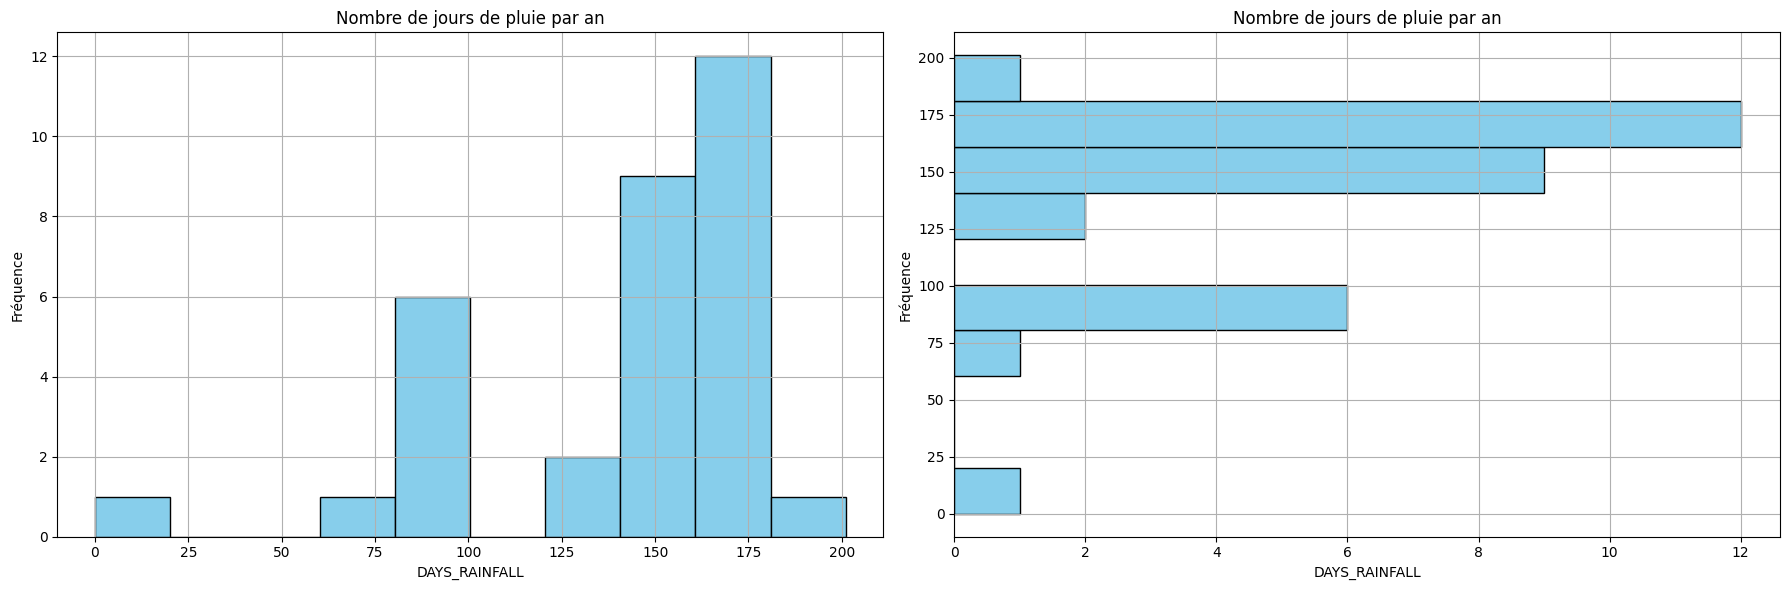

In [149]:
# Création de la figure avec 2 sous-graphiques (1 ligne, 2 colonnes)
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

axs[0].hist(df['DAYS_RAINFALL'], bins=10, edgecolor='black', color='skyblue')
axs[0].set_title('Nombre de jours de pluie par an')
axs[0].set_xlabel('DAYS_RAINFALL')
axs[0].set_ylabel('Fréquence')
axs[0].grid(True)

axs[1].hist(df['DAYS_RAINFALL'], bins=10, edgecolor='black', color='skyblue', orientation='horizontal')
axs[1].set_title('Nombre de jours de pluie par an')
axs[1].set_xlabel('DAYS_RAINFALL')
axs[1].set_ylabel('Fréquence')
axs[1].grid(True)

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage du graphique
plt.show()

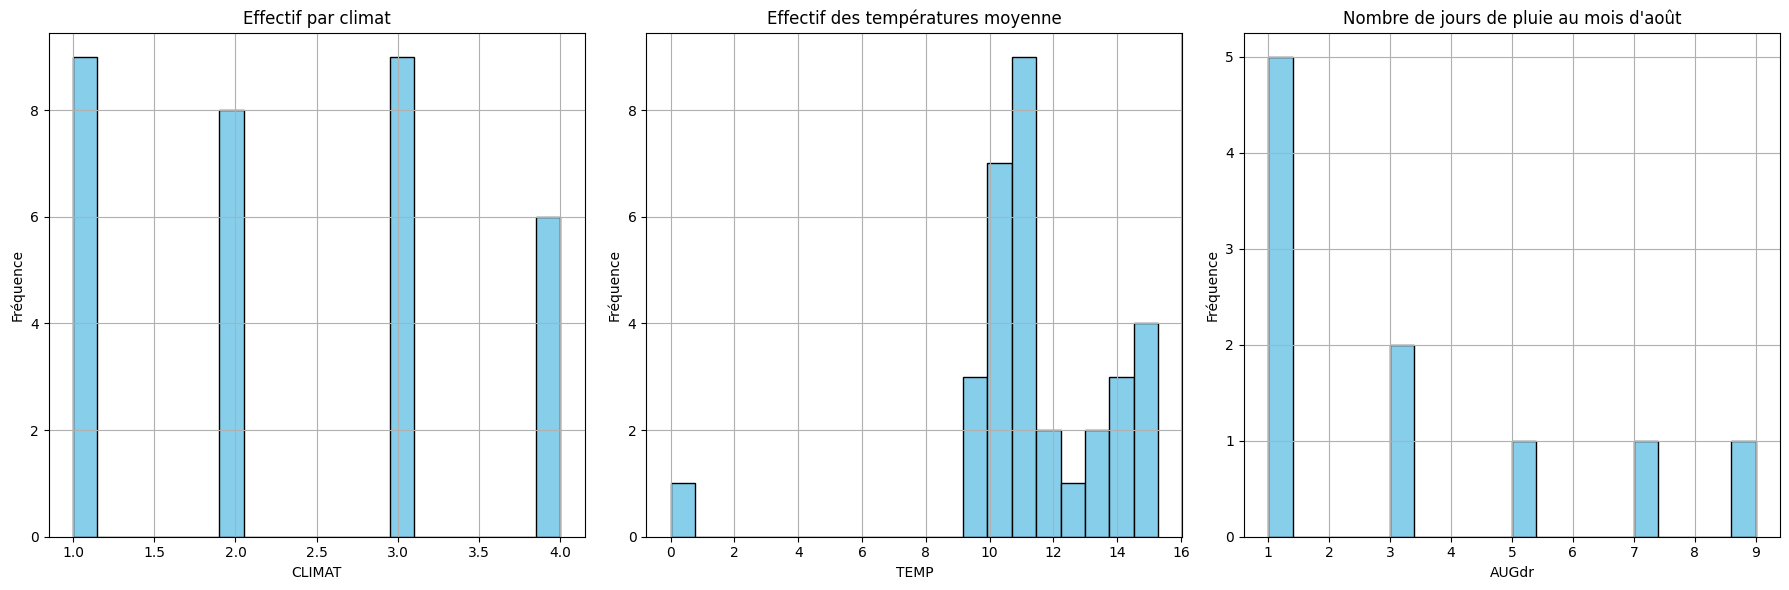

In [150]:
# Préparation des variables
climat_counts = df['CLIMAT']
temp_counts = df['TEMP']
augr_counts = df['AUGdr'].value_counts()

# Création de la figure avec 3 sous-graphiques (1 ligne, 3 colonnes)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].hist(climat_counts, bins=20, edgecolor='black', color='skyblue')
axs[0].set_title('Effectif par climat')
axs[0].set_xlabel('CLIMAT')
axs[0].set_ylabel('Fréquence')
axs[0].grid(True)

axs[1].hist(temp_counts, bins=20, edgecolor='black', color='skyblue')
axs[1].set_title('Effectif des températures moyenne')
axs[1].set_xlabel('TEMP')
axs[1].set_ylabel('Fréquence')
axs[1].grid(True)

axs[2].hist(augr_counts, bins=20, edgecolor='black', color='skyblue')
axs[2].set_title('Nombre de jours de pluie au mois d\'août')
axs[2].set_xlabel('AUGdr')
axs[2].set_ylabel('Fréquence')
axs[2].grid(True)

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage du graphique
plt.show()

Lorsque l'on porte attention au premier graphique, on constate que la répartition des différents climats est quasi équivalente avec 2 groupes qui se distinguent malgré tout.

Le second vient montrer la répartition des températures moyennes pour chaque villes. Contrairement aux boîtes de Tukey, il met bien plus en avant les valeurs qui se distinguent le mieux, mais vient également approfondir l'analyse que proposait ces dernières. En effet, on peut voir plus précisemment que les températures qui reviennent le plus se situent entre de 10 et 11 degrés. Là où il y a le plus d'observations. A l'inverse, plus les températures augmentent, moins il y a d'observations, ce qui n'est pas étonnant.

A l'inverse du précédent, sur les précipitations du mois d'août, les jours de pluie sont revus à la hausse avec près de 12 jours de pluie pour une grande partie des villes.

### Diagramme en secteur

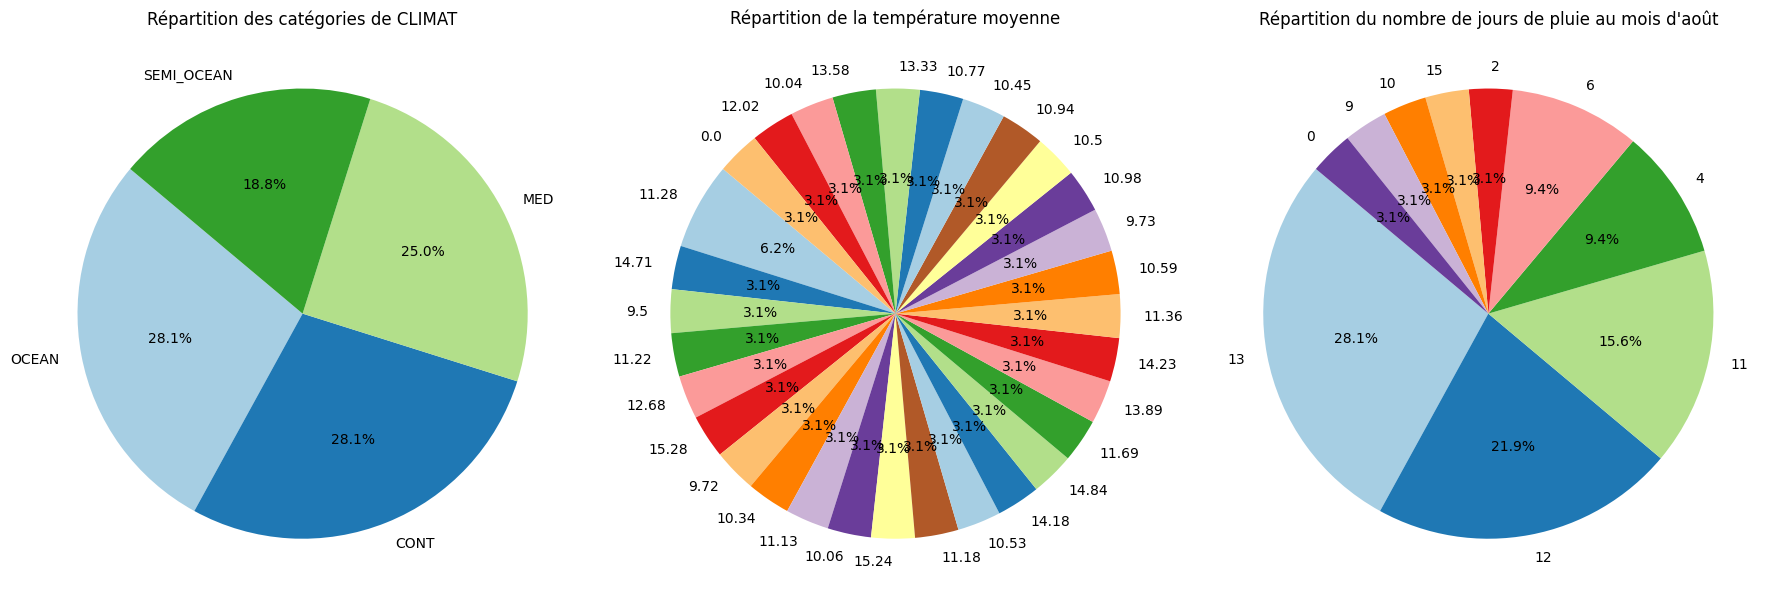

In [151]:
df = pre_process_data(df)

# Préparation des variables
climat_counts = df['CLIMAT'].value_counts()
temp_counts = df['TEMP'].value_counts()
augr_counts = df['AUGdr'].value_counts()

# Création de la figure avec 3 sous-graphiques (1 ligne, 3 colonnes)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].pie(climat_counts, labels=climat_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[0].set_title(f'Répartition des catégories de CLIMAT')

axs[1].pie(temp_counts, labels=temp_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[1].set_title(f'Répartition de la température moyenne')

axs[2].pie(augr_counts, labels=augr_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
axs[2].set_title(f'Répartition du nombre de jours de pluie au mois d\'août')

# Ajustement de l'affichage pour éviter le chevauchement
plt.tight_layout()

# Affichage du plot
plt.show()

Bien que le climat soit difficilement représenté par les autres graphiques, il est bien mis en évidence ici sur une représentation circulaire. On constate tout de même la quasi égalité des 4 valeurs. Mais dans un autre contexte, une importante majorité ou minorité qui s'en dégagerait serait facilement mise en lumière.

En revanche, c'est là que l'on peut constater qu'une variable constinue n'est pas à son avantage. Toutes les valeurs de l'échantillon sont différentes ou presque et donc vient surcharger notre graphique, ce qui le rend impossible à analyser.

Comme le climat, les précipitations sur le mois d'août sont davantage mises en avant sur celui-ci par sa qualité de variable discrète. Ce qui permet d'appuyer notre analyse précédente en montrant que le plus grand nombre des villes accueillent 12 et 13 jours de pluie au mois d'août.

### Création de 2 sous dataset

In [152]:
sub_data_1 = df[:10]

sub_data_1.describe()

,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,AUGr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,90.200000,2918.900000,82.900000,69.700000,62.900000,58.900000,68.6000,67.500000,48.700000,73.100000,...,12.000000,13.600000,14.900000,15.900000,156.600000,11.762000,14.720000,1996.000000,45.917000,1.61000
std,10.478762,1249.541823,31.267484,24.294718,20.452927,20.212482,17.2382,23.363076,18.702644,30.450141,...,2.666667,2.503331,2.424413,2.766867,28.351759,1.587883,2.503242,300.711009,2.334462,3.89347
min,77.000000,808.000000,28.000000,27.000000,30.000000,39.000000,43.0000,23.000000,10.000000,15.000000,...,6.000000,10.000000,11.000000,12.000000,95.000000,10.040000,10.200000,1757.000000,41.550000,-4.29000
25%,79.750000,1985.250000,65.000000,52.750000,51.000000,44.250000,55.7500,55.750000,44.250000,61.250000,...,11.250000,12.250000,14.250000,14.250000,148.750000,10.567500,13.150000,1897.500000,44.722500,-0.33750
50%,92.400000,3069.500000,78.500000,68.500000,62.000000,52.500000,69.0000,65.500000,49.500000,68.000000,...,12.500000,13.500000,15.000000,16.000000,161.000000,11.110000,14.700000,1910.000000,46.310000,-0.06000
75%,98.450000,3694.750000,98.500000,86.250000,72.750000,71.000000,77.0000,79.000000,52.750000,79.750000,...,13.000000,14.750000,15.750000,17.000000,169.000000,13.002500,16.450000,1975.250000,47.257500,4.52000
max,103.600000,4888.000000,130.000000,105.000000,98.000000,102.000000,100.0000,107.000000,80.000000,123.000000,...,16.000000,19.000000,20.000000,22.000000,201.000000,14.710000,18.300000,2811.000000,49.110000,8.44000


Ce sous-dataset contient les 10 premières valeurs du dataset complet.

In [153]:
sub_data_2 = df[10:]

sub_data_2.describe()

,NO2,DENSITY,JANr,FEBr,MARr,APRr,MAYr,JUNr,JULr,AUGr,...,SEPdr,OCTdr,NOVdr,DECdr,DAYS_RAINFALL,TEMP,TEMP_RANGE,SUNSHINE,LATITUDE,LONGITUDE
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,110.790909,5021.727273,56.136364,54.863636,51.409091,47.863636,52.363636,53.727273,41.272727,56.545455,...,10.136364,11.318182,12.409091,13.590909,131.272727,11.347727,15.336364,2007.727273,44.033182,2.903182
std,22.760155,4343.262732,19.315169,17.588675,16.683779,14.632955,16.084732,20.951604,19.835470,24.139924,...,3.589607,3.400089,4.159431,4.305689,45.293941,3.155441,3.790030,623.638264,10.131192,2.619066
min,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.410000
25%,99.700000,3515.250000,51.250000,48.250000,42.250000,44.250000,47.500000,40.250000,25.500000,40.750000,...,7.000000,9.000000,9.250000,10.250000,89.000000,10.387500,14.800000,1726.250000,43.375000,1.077500
50%,110.900000,4043.500000,56.500000,52.500000,52.000000,46.500000,52.000000,54.500000,46.500000,58.500000,...,12.000000,12.000000,14.500000,15.000000,155.500000,11.200000,15.700000,1880.000000,45.925000,2.785000
75%,117.000000,5108.000000,65.750000,58.750000,59.750000,54.750000,60.250000,63.250000,54.750000,66.750000,...,12.750000,13.000000,15.000000,16.000000,164.250000,13.587500,17.400000,2477.250000,48.275000,5.057500
max,161.800000,21258.000000,87.000000,86.000000,82.000000,70.000000,83.000000,94.000000,74.000000,104.000000,...,14.000000,15.000000,16.000000,18.000000,171.000000,15.280000,18.600000,2917.000000,50.380000,7.450000


Ce sous-dataset contient les 22 dernières valeurs du dataset complet.

### Énumération de toutes les valeurs prises par la variable discrète

In [154]:
# Exemple de variable discrète
valeurs_uniques = df['NO2'].unique()
print("Valeurs prises par la variable discrète :", valeurs_uniques)
print("Nombre de valeurs uniques prises apr NO2 : ",len(valeurs_uniques))

Valeurs prises par la variable discrète : [ 82.   78.   79.   99.6  77.  103.   90.4  95.  103.6  94.4 115.   96.6
 100.  117.  156.  119.   99.  161.8 112.2 109.6 107.  122.  131.6 115.8
 102.   45. ]
Nombre de valeurs uniques prises apr NO2 :  26


### Effectif par valeur

In [155]:
# Effectif par valeur
effectifs = df['NO2'].value_counts()
print(effectifs)

NO2
96.6     3
117.0    2
99.6     2
103.0    2
115.0    2
119.0    1
102.0    1
115.8    1
131.6    1
122.0    1
107.0    1
109.6    1
112.2    1
161.8    1
99.0     1
82.0     1
156.0    1
78.0     1
100.0    1
94.4     1
103.6    1
95.0     1
90.4     1
77.0     1
79.0     1
45.0     1
Name: count, dtype: int64


### Centrer et réduire

In [156]:
# Centrer et réduire la variable NO2
df['NO2_centre_reduit'] = (df['NO2'] - df['NO2'].mean()) / df['NO2'].std()

# Afficher les premières lignes
print(df[['NO2', 'NO2_centre_reduit']].head())

           NO2  NO2_centre_reduit
Ajaccio   82.0          -1.023807
Angers    78.0          -1.206988
Angoulme  79.0          -1.161193
Besancon  99.6          -0.217813
Biarritz  77.0          -1.252783


Pour la première ligne, la valeur de NO2 est 82.0, et après centrage et réduction, elle est -1.259, ce qui signifie qu'elle est environ 1.26 écarts-types en dessous de la moyenne.

Pour la quatrième ligne, avec un NO2 de 99.6, la valeur centrée et réduite est -0.346, ce qui est proche de la moyenne (indiquant qu'elle est légèrement en dessous de la moyenne).

L'avntage de centrer et réduire, c'est de ramener les valeurs des variables à même échelle.